### Table of Contents <a class="anchor" id="ADiC_toc"></a>

* [Table of Contents](#ADiC_toc)
    * [Page 1 - Introduction](#ADiC_page_1)
    * [Page 2 - Anomaly Detection](#ADiC_page_2)
  











<hr style="height:5px;border-width:0;color:Olive;background-color:Olive">

# Page 1 - Introduction <a class="anchor" id="ADiC_page_1"></a>

[Back to Top](#ADiC_toc)

<hr style="height:5px;border-width:0;color:Olive;background-color:Olive">

## Anomaly Detection in Cybersecurity

Anomaly detection is a key technique in data science and machine learning that is extensively used in cybersecurity. At its core, anomaly detection involves identifying data points or patterns that deviate significantly from the expected or normal behavior. These 'anomalies' or 'outliers' could indicate an error, a novelty, or more critically, a potential threat or security breach in the context of cybersecurity. 

Anomaly detection is especially useful in cybersecurity because threats often manifest as anomalies in the network or system behavior. Here's a general plan for discussing this topic in a presentation:

1. **Introduction to Anomaly Detection** (10 minutes)
    - Define what an anomaly is and how it is statistically identified.
    - Discuss the basic principle behind anomaly detection: learning what's normal to detect what's not.
    - Mention the main types of anomalies: point anomalies, contextual anomalies, and collective anomalies.

2. **Role of Anomaly Detection in Cybersecurity** (15 minutes)
    - Discuss how cybersecurity threats often manifest as anomalous behavior.
    - Explain the role of anomaly detection in identifying unusual network traffic, unauthorized access, or abnormal user behavior.
    - Present a real-world example of a security breach detected through anomaly detection.

3. **Techniques Used in Anomaly Detection for Cybersecurity** (20 minutes)
    - Discuss statistical methods, such as z-score or standard deviation, to detect anomalies.
    - Explain the use of machine learning models, like clustering algorithms (K-means) or classification algorithms (SVM), to identify abnormal behavior.
    - Discuss the role of deep learning methods, particularly autoencoders, in detecting complex or subtle anomalies.
    - Explain the concept of supervised, unsupervised, and semi-supervised learning in the context of anomaly detection.

4. **Case Study: Anomaly Detection in Action** (15 minutes)
    - Walk the audience through a specific case where anomaly detection helped prevent or mitigate a cybersecurity threat.
    - Explain the specific techniques and methodologies used in the case.

5. **Challenges in Anomaly Detection for Cybersecurity** (15 minutes)
    - Discuss the challenges, such as the difficulty of defining what's "normal", the risk of false positives and negatives, and the constantly evolving nature of cybersecurity threats.
    - Explain how these challenges can be mitigated, for instance, by regularly updating the models with new data and incorporating feedback loops.

6. **Conclusion** (5 minutes)
    - Recap the main points discussed in the presentation.
    - Highlight the importance of anomaly detection in modern cybersecurity strategies.

Remember to use visual aids and graphics to make the presentation more engaging. Real-world examples and case studies can also help your audience understand the practical applications of anomaly detection in cybersecurity.


## Introduction to Anomaly Detection
The core idea behind anomaly detection is quite intuitive: you want to establish a definition of what is "normal", and then look for data points that deviate from this normal behavior.

The first step in this process is defining "normal" behavior. In a statistical sense, this typically means identifying the central tendency (e.g., mean or median) and dispersion (e.g., standard deviation or interquartile range) of your data. These measures collectively form the "model" of normal behavior. 

For instance, if your data is normally distributed, most of your data points will lie within a certain distance (say, three standard deviations) from the mean. Any data point that lies beyond this distance might be considered an anomaly. 

simple example using Python that creates a normally distributed dataset and identifies anomalies as those points that lie more than three standard deviations from the mean.

First, let's create a normally distributed dataset using numpy's random.randn function:

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a normally distributed dataset
np.random.seed(0) 
data = np.random.randn(1000)

# Convert the data into a DataFrame for easier manipulation
df = pd.DataFrame(data, columns=['Data'])

In [19]:
df

,Data,Anomaly
0,1.764052,False
1,0.400157,False
2,0.978738,False
3,2.240893,False
4,1.867558,False
...,...,...
995,0.412871,False
996,-0.198399,False
997,0.094192,False
998,-1.147611,False


Then, we can calculate the mean and standard deviation of the data, and use them to identify anomalies:

In [16]:
# Calculate the mean and standard deviation
mean = df['Data'].mean()
std_dev = df['Data'].std()

# Identify anomalies
df['Anomaly'] = abs(df['Data'] - mean) > 3*std_dev

Finally, we can visualize the data and the identified anomalies:

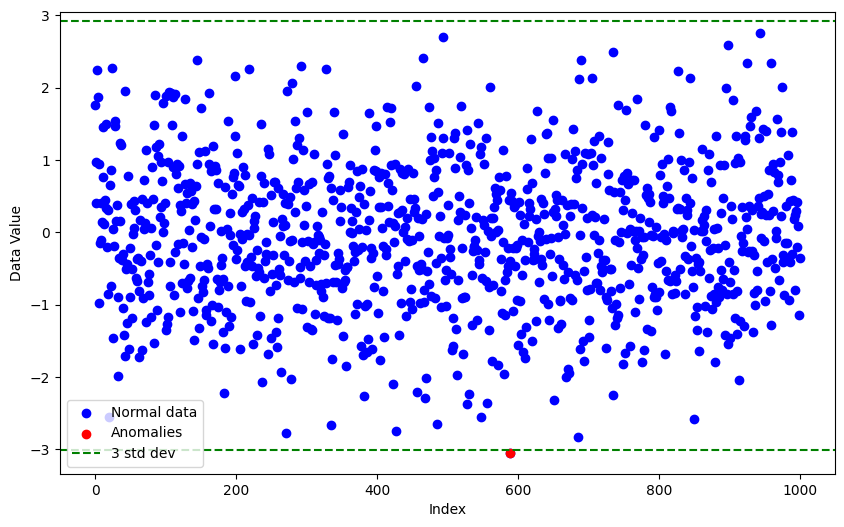

In [17]:
# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Data'], color='blue', label='Normal data')
plt.scatter(df[df['Anomaly']].index, df[df['Anomaly']]['Data'], color='red', label='Anomalies')

# Draw lines for 3 standard deviations
plt.axhline(y=mean + 3*std_dev, color='g', linestyle='dashed', label='3 std dev')
plt.axhline(y=mean - 3*std_dev, color='g', linestyle='dashed')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.legend()
plt.show()


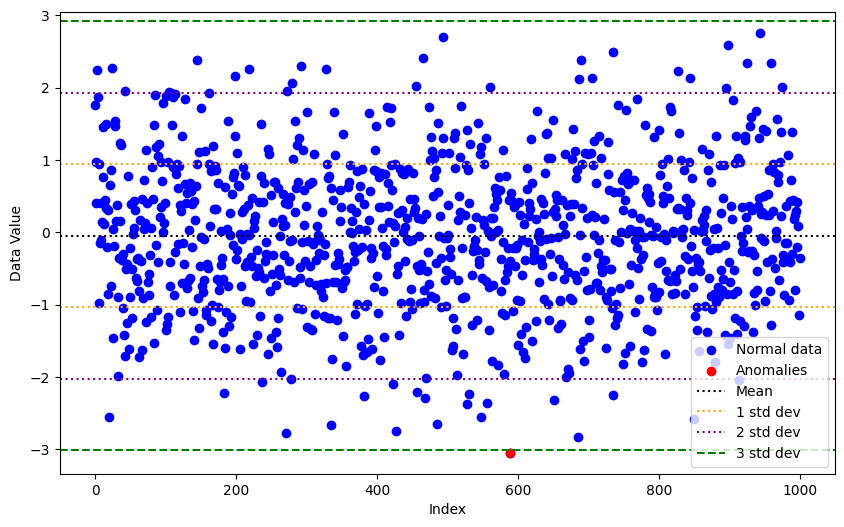

In [18]:
# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Data'], color='blue', label='Normal data')
plt.scatter(df[df['Anomaly']].index, df[df['Anomaly']]['Data'], color='red', label='Anomalies')

# Draw lines for the mean, 1st, 2nd, and 3rd standard deviations
plt.axhline(y=mean, color='black', linestyle='dotted', label='Mean')
plt.axhline(y=mean + std_dev, color='orange', linestyle='dotted', label='1 std dev')
plt.axhline(y=mean - std_dev, color='orange', linestyle='dotted')
plt.axhline(y=mean + 2*std_dev, color='purple', linestyle='dotted', label='2 std dev')
plt.axhline(y=mean - 2*std_dev, color='purple', linestyle='dotted')
plt.axhline(y=mean + 3*std_dev, color='g', linestyle='dashed', label='3 std dev')
plt.axhline(y=mean - 3*std_dev, color='g', linestyle='dashed')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.legend()
plt.show()


In this updated plot, the black dotted line represents the mean of the data, orange dotted lines represent 1 standard deviation above and below the mean, purple dotted lines represent 2 standard deviations above and below the mean, and green dashed lines represent 3 standard deviations above and below the mean. Data points are colored red if they fall more than three standard deviations from the mean, indicating that they are anomalies.

Sometimes, normal behavior can't be captured effectively with simple statistical measures. This is often the case with high-dimensional data, or when the underlying data distribution is complex or unknown. In such cases, machine learning techniques can be useful. Unsupervised learning algorithms, such as clustering or autoencoders, can learn the structure of the input data and hence model normal behavior. 

Once a model of normality is established, the next step is to identify deviations from this model. The specific method of detecting anomalies depends on the model. For a statistical model, this might involve checking if a data point lies within a certain range. For a machine learning model, this could involve reconstructing a data point and measuring the reconstruction error. 

In all cases, the goal is to quantify the degree to which a data point deviates from the normal behavior. This deviation can then be used to identify potential anomalies. The challenge in anomaly detection lies in setting the right threshold for this deviation, which often involves a trade-off between false positives and false negatives. 

It's worth noting that while the principle of "learning what's normal to detect what's not" generally holds, there are some forms of anomaly detection that are designed to directly model the anomalies themselves. This can be particularly useful in cases where you have labeled data for anomalies, or when the anomalies follow a specific, known pattern.

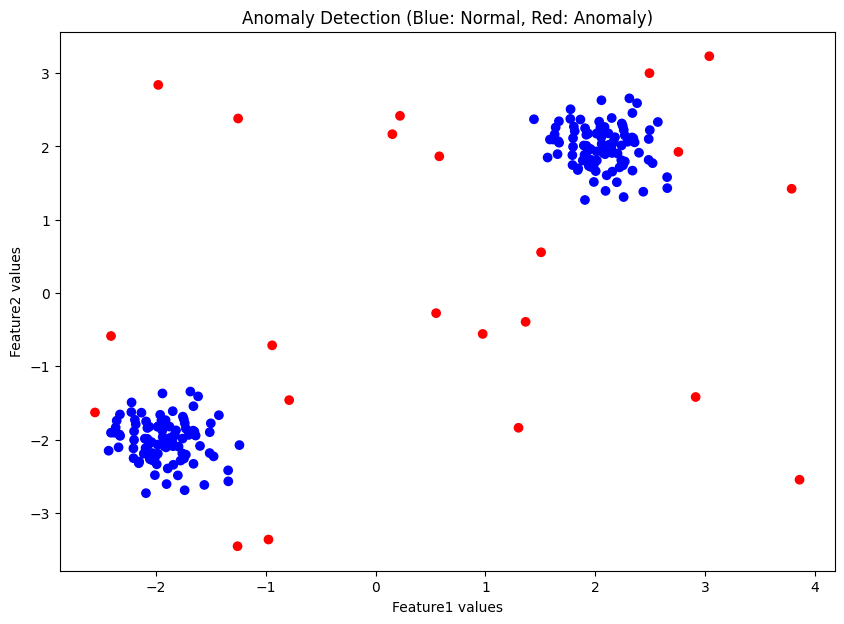

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)


# Create a dataset
np.random.seed(1)
normal_data = 0.3 * np.random.randn(100, 2)
anomalies = np.random.uniform(low=-4, high=4, size=(20, 2))
data = np.r_[normal_data + 2, normal_data - 2, anomalies]

# Convert the data into a DataFrame for easier manipulation
df = pd.DataFrame(data, columns = ['Feature1', 'Feature2'])

# Fit the model
model = IsolationForest(contamination=0.1)
model.fit(df[['Feature1', 'Feature2']])

# Predict the anomalies in the data
df['anomaly'] = model.predict(df)

# Visualize the data
plt.figure(figsize=(10,7))
plt.scatter(df['Feature1'], df['Feature2'], color=df['anomaly'].map({1:'blue', -1:'red'}))
plt.xlabel('Feature1 values')
plt.ylabel('Feature2 values')
plt.title('Anomaly Detection (Blue: Normal, Red: Anomaly)')
plt.show()


In this example, we generate two clusters of normal (inliers) data and a group of anomalies. The IsolationForest algorithm is then used to predict which data points are normal and which are anomalies. The results are visualized in a scatter plot, with green points indicating normal data and red points indicating anomalies.

This is a simple demonstration. Real-world anomaly detection for cybersecurity involves more complex datasets and may use a combination of techniques.

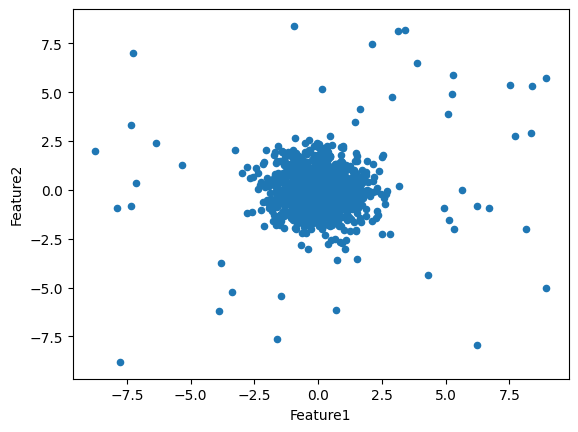

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Normal data
np.random.seed(0)
normal_data = np.random.randn(1000, 2) 

# Anomalies
anomalies = np.random.uniform(low=-9, high=9, size=(50, 2))

# Concatenate both into a single numpy array
data = np.concatenate([normal_data, anomalies])

# Convert to DataFrame for ease of use
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

df.plot(kind='scatter', x='Feature1', y='Feature2')
plt.show()


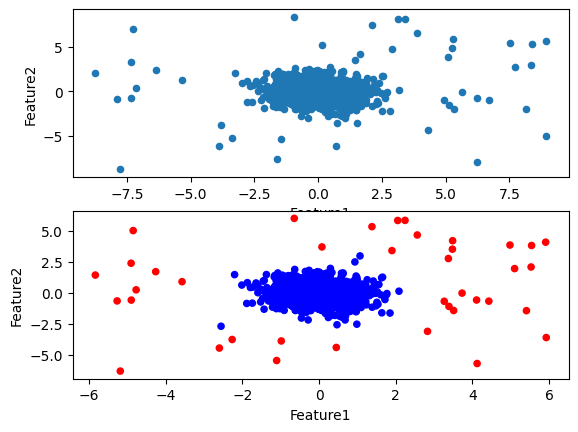

In [10]:
mean = df.mean()
std_dev = df.std()
z_scores = (df - mean) / std_dev

# Set up the plot
fig, ax = plt.subplots(2, 1)

# Plot the original data
df.plot(kind='scatter', x='Feature1', y='Feature2', ax=ax[0])

# Plot data after z-scoring (blue) and if it's an anomaly by standard deviation (red)
z_scores.plot(kind='scatter', x='Feature1', y='Feature2', color=((abs(z_scores)>3).any(axis=1)).map({False:'blue', True:'red'}), ax=ax[1])
plt.show()


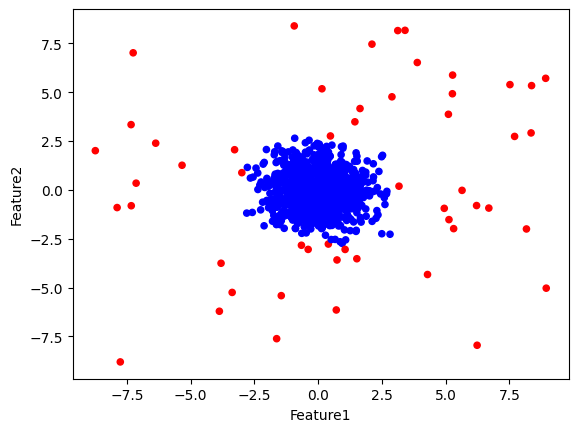

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Anomaly detection using IQR
is_anomaly = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Plot the results
df.plot(kind='scatter', x='Feature1', y='Feature2', color=is_anomaly.any(axis=1).map({False:'blue', True:'red'}))
plt.show()

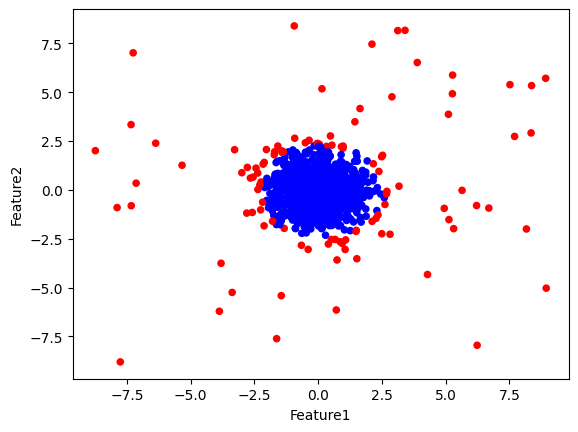

In [12]:
# Fit the model
model = IsolationForest(contamination=0.1)
model.fit(df)

# Predict the anomalies in the data
df['anomaly'] = model.predict(df)

# Plot the data
df.plot(kind='scatter', x='Feature1', y='Feature2', color=df['anomaly'].map({1:'blue', -1:'red'}))
plt.show()

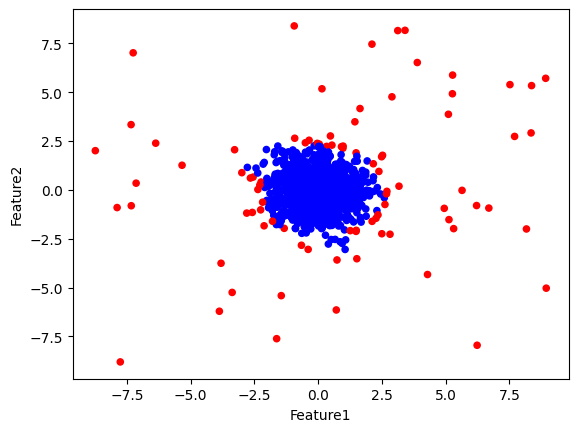

In [13]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Fit the model
model = DBSCAN(eps=0.3, min_samples=5)
model.fit(data_scaled)

# Add the results to the DataFrame
df['anomaly'] = model.labels_

# Plot the data
df.plot(kind='scatter', x='Feature1', y='Feature2', color=df['anomaly'].map(lambda x: 'red' if x == -1 else 'blue'))
plt.show()

33/33 [==============================] - 0s 571us/step


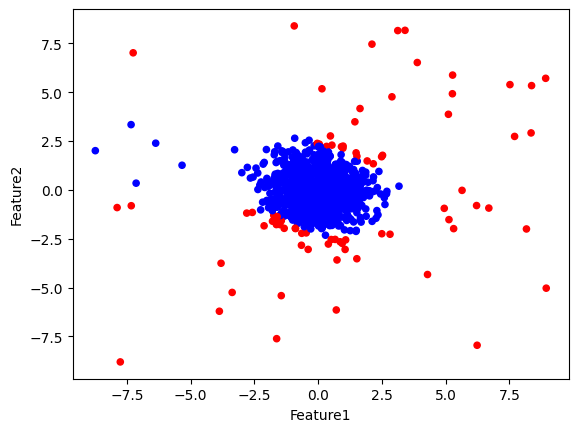

In [14]:
# Define the autoencoder
inputs = Input(shape=(2,))
encoded = Dense(2, activation='relu')(inputs)
decoded = Dense(2)(encoded)
autoencoder = Model(inputs, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mse')

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Feature1', 'Feature2']])

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, verbose=0)

# Use the autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(data_scaled)

# Calculate the mean squared error for each point
mse = np.mean(np.power(data_scaled - reconstructed_data, 2), axis=1)

# If the error is above a certain threshold, mark it as an anomaly
df['anomaly'] = mse > 1  # the threshold is set to 1 for this example, adjust according to your needs

# Plot the data
df.plot(kind='scatter', x='Feature1', y='Feature2', color=df['anomaly'].map({False: 'blue', True: 'red'}))
plt.show()


Anomalies, often referred to as outliers, are data points that deviate significantly from other observations. They can provide meaningful information and insights in various fields, including but not limited to, finance, health care, cybersecurity, and industrial automation. 

Anomalies can be broadly categorized into three main types: point anomalies, contextual anomalies, and collective anomalies. Each of these types is characterized by different properties and behaviors:

1. **Point Anomalies**: These are individual data points that deviate markedly from the rest of the dataset. They are the simplest type of anomaly and are often the primary focus in basic anomaly detection. For example, in a real estate dataset, a house with a significantly higher price compared to other houses in the same area could be considered a point anomaly.

2. **Contextual Anomalies**: These anomalies are context-specific. They depend not only on the value of the data point itself but also on the surrounding data and environment. An observation might not be an anomaly in and of itself, but becomes one when it is considered within its context. For example, using an air conditioner during winter may be considered a contextual anomaly. The action of using an air conditioner is not an anomaly, but it becomes one when considered in the context of the winter season.

3. **Collective Anomalies**: These anomalies consist of a collection of related data points that, as a group, exhibit anomalous behavior. The individual data points may not be anomalies by themselves, but their occurrence together as a group is anomalous. This is common in dynamic datasets where data points are related to each other, such as time-series data. For example, consider a dataset representing the normal rhythm of a heart. A single heartbeat might fall within the normal range and thus not be considered an anomaly, but an unusual sequence of these normal heartbeats might indicate a problem, hence forming a collective anomaly.

In each case, the challenge of anomaly detection is to accurately and efficiently identify these anomalous behaviors without raising too many false alarms. Different methods and techniques are used depending on the type of anomaly to be detected and the nature of the data being analyzed.

Cybersecurity threats often involve activities that deviate from the standard, expected behavior, making them good candidates for anomaly detection techniques. These anomalous behaviors can be associated with different types of cyber threats, including but not limited to:

1. **Intrusion Detection**: One of the most common applications of anomaly detection in cybersecurity is in Intrusion Detection Systems (IDS). Intruders or hackers often leave traces of their activities that deviate from the normal usage patterns. For example, an unusually high number of login attempts, especially failed ones, can be an indicator of a brute force attack. Similarly, abnormal amounts of data transfer can indicate data exfiltration attempts.

2. **Malware Detection**: Malware often behaves differently from legitimate software. It may cause a system to make unexpected network connections, use system resources at unusual times, or access sensitive files unexpectedly. Such behaviors can be flagged as anomalies and trigger malware detection.

3. **Phishing Detection**: Phishing attacks, particularly through emails, often contain anomalies such as unusual senders, strange URLs, or atypical email body content. Data science techniques, especially Natural Language Processing, can be used to detect these anomalies and flag potential phishing attempts.

4. **Insider Threat Detection**: Not all threats come from outside an organization. Sometimes, a threat can come from within, such as an employee misusing their access privileges. These insider threats can manifest as anomalies in the user's behavior, such as accessing sensitive data they typically don't work with, logging in at odd hours, or making unauthorized changes.

5. **Denial of Service (DoS) or Distributed Denial of Service (DDoS) Detection**: In a DoS or DDoS attack, the attacker overwhelms a network, service, or server with traffic to make it inaccessible to its intended users. A sudden spike in traffic, therefore, could be an anomaly indicating a potential DoS/DDoS attack.

In all these situations, the key to effective anomaly detection is establishing what normal behavior looks like. This normal behavior model can be established using historical data and continuously updated as more data is collected. It's also important to adjust the sensitivity of anomaly detection algorithms to balance the number of false positives and false negatives. Too many false positives can lead to "alarm fatigue", while too many false negatives can let actual threats slip through.